In [82]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import linear_model

from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm, preprocessing 
from sklearn.tree import DecisionTreeRegressor

import cufflinks as cf
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import os

In [83]:
data = pd.read_csv(r"D:\8th Semester B.Tech (IT)\4. Major Project\Diamond.csv")

In [84]:
data

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [85]:
data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  int64  
 2   color           53940 non-null  int64  
 3   clarity         53940 non-null  int64  
 4   height (in mm)  53940 non-null  float64
 5   table           53940 non-null  float64
 6   price (in USD)  53940 non-null  int64  
 7   length (in mm)  53940 non-null  float64
 8   width (in mm)   53940 non-null  float64
 9   depth (in mm)   53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [87]:
data.isnull().sum()

carat             0
cut               0
color             0
clarity           0
height (in mm)    0
table             0
price (in USD)    0
length (in mm)    0
width (in mm)     0
depth (in mm)     0
dtype: int64

In [88]:
data.dtypes

carat             float64
cut                 int64
color               int64
clarity             int64
height (in mm)    float64
table             float64
price (in USD)      int64
length (in mm)    float64
width (in mm)     float64
depth (in mm)     float64
dtype: object

In [89]:
data.describe()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [90]:
zero_data = data[(data['length (in mm)'] == 0) | (data['width (in mm)'] == 0) | (data['depth (in mm)'] == 0)]

In [91]:
zero_data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
2207,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0


In [92]:
zero_data.shape

(20, 10)

In [93]:
data.drop(zero_data.index, inplace = True)

In [94]:
data.shape

(53920, 10)

In [95]:
X = data.drop(['price (in USD)'], axis=1)
y = data['price (in USD)']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
print("Total dataset size: {}".format(data.shape))
print("Training set size (80%): {}".format(X_train.shape))
print("Test set size (20%): {}".format(X_test.shape))

Total dataset size: (53920, 10)
Training set size (80%): (43136, 9)
Test set size (20%): (10784, 9)


In [98]:
res=[]

In [99]:
for i in range(1,201):

    regressor=DecisionTreeRegressor(max_depth=i)
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_train)
    res.insert(i,metrics.r2_score(y_train,y_pred))

In [100]:
display(res)

[0.6084092385143545,
 0.8283588712881926,
 0.8899915186129368,
 0.9159899904196503,
 0.9388213457795143,
 0.954674786343887,
 0.9647448400295724,
 0.9719080551290885,
 0.9775422328676526,
 0.9818677763879321,
 0.9852616844835045,
 0.9878638352736092,
 0.9902306918750189,
 0.9924023657124402,
 0.9942622080006795,
 0.9957706496523926,
 0.9969076560821988,
 0.9978737128004186,
 0.998573159761934,
 0.9990396684888021,
 0.9993285118910531,
 0.9995963456183499,
 0.9997685575914943,
 0.9998774502860103,
 0.9999424197860896,
 0.9999758076911219,
 0.9999854266373354,
 0.9999896734881132,
 0.9999942487259695,
 0.99999468937291,
 0.9999948372371547,
 0.999994890901476,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.9999949054479457,
 0.999994905447945

In [101]:
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.9999949054479457
Adjusted R^2: 0.9999949043847595
MAE: 0.47849437438180015
MSE: 81.03820861152325
RMSE: 9.002122450373758


In [102]:
max_depth=[i+1 for i in range(200)]

In [103]:
print(max_depth)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [104]:
df=pd.DataFrame({'max_depth':max_depth,'Accuracy':res})

In [105]:
df

,max_depth,Accuracy
0,1,0.608409
1,2,0.828359
2,3,0.889992
3,4,0.915990
4,5,0.938821
...,...,...
195,196,0.999995
196,197,0.999995
197,198,0.999995
198,199,0.999995


Text(0.5, 1.0, 'max_depth vs Accuracy')

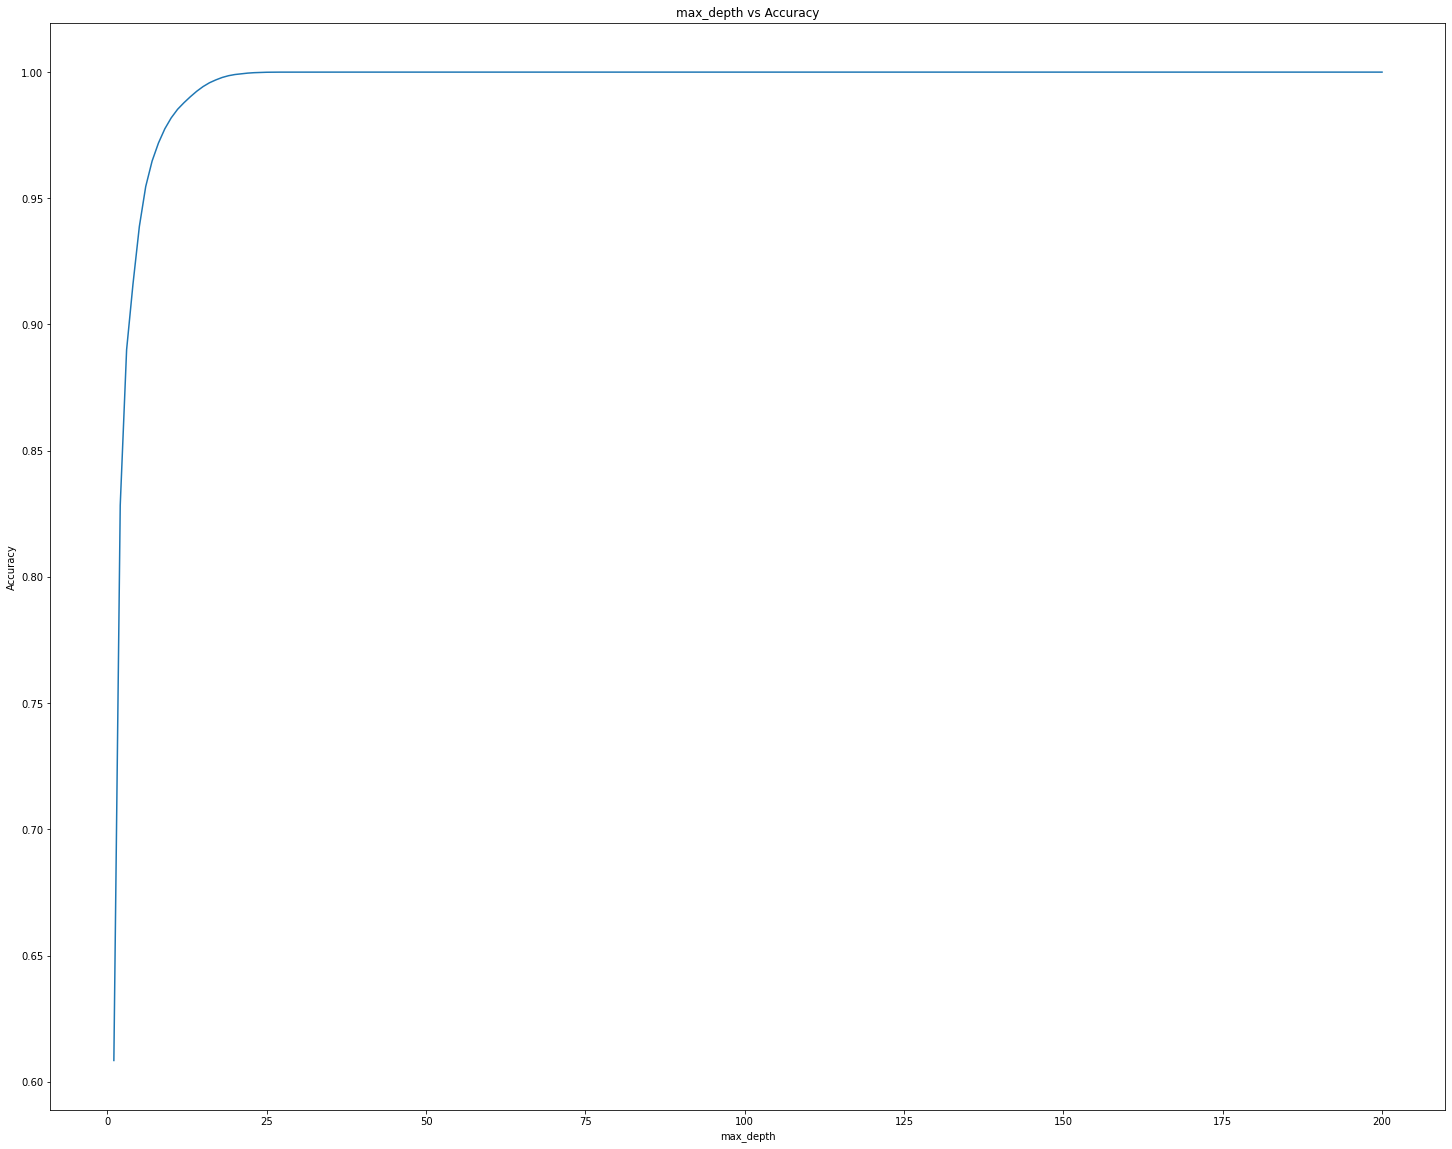

In [106]:
f=plt.figure(figsize=(20,25))
f.set_figwidth(25)
f.set_figheight(20)
plt.plot(max_depth,res)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")

In [107]:
file="max_depth_acc.xlsx"

In [108]:
df.to_excel(file)

In [109]:
max_d=res.index(max(res))+1
print("At max_depth={}, Max Accuracy={}".format(max_d,max(res)*100))

At max_depth=33, Max Accuracy=99.99949054479457


In [110]:
regressor1=DecisionTreeRegressor(max_depth=max_d)
regressor1.fit(X_train,y_train)
y_test_pred=regressor1.predict(X_test)

In [111]:
print('R^2:',metrics.r2_score(y_test,y_test_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

R^2: 0.9675318135094464
Adjusted R^2: 0.9675046913933878
MAE: 350.94301743323444
MSE: 515031.4528699926
RMSE: 717.6569186386993


In [112]:
df1=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':y_test_pred})

In [113]:
df1

,Actual Price,Predicted Price
39793,1095,979.0
43610,507,492.0
25710,14615,10042.0
41580,388,453.0
12756,5322,5411.0
...,...,...
37179,972,972.0
18477,7523,8022.0
28766,680,680.0
30025,718,770.0


In [114]:
file1="result_dt.xlsx"

In [115]:
df1.to_excel(file1)

In [116]:
I=[]
for i in range (1,10785):
    I.insert(i,i)

In [117]:
display(I)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [118]:
I1=y_test.tolist()

In [119]:
I2=y_test_pred.tolist()

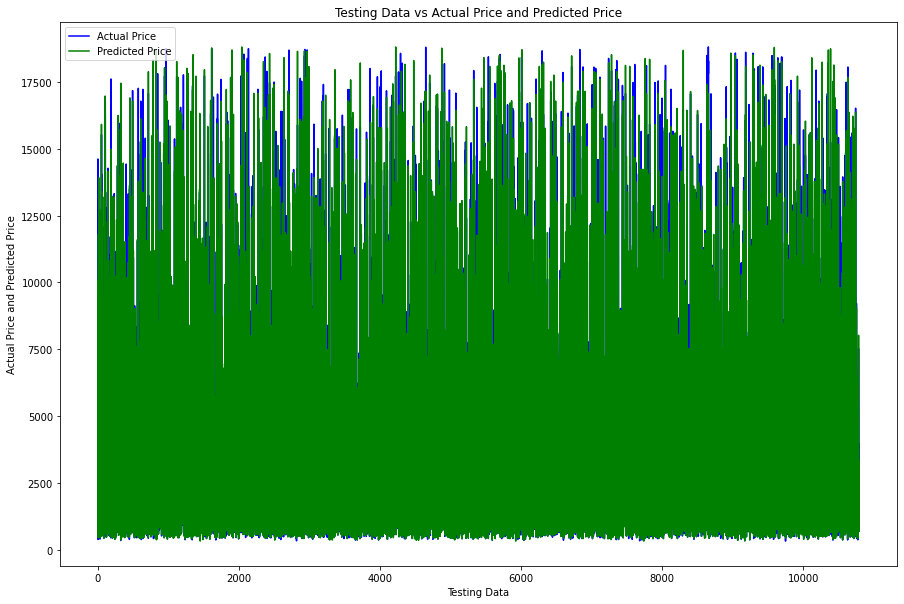

In [120]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I, I1, 'b', label='Actual Price')
plt.plot(I, I2, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [121]:
I3=I[0:1000]

In [122]:
I4=I1[0:1000]

In [123]:
I5=I2[0:1000]

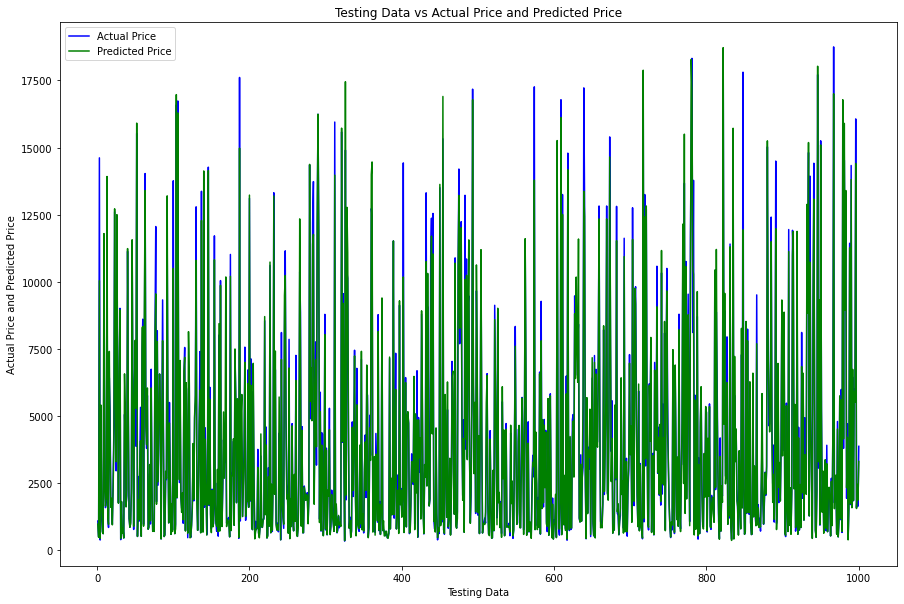

In [124]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I3, I4, 'b', label='Actual Price')
plt.plot(I3, I5, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [125]:
I6=I[0:100]

In [126]:
I7=I1[0:100]

In [127]:
I8=I2[0:100]

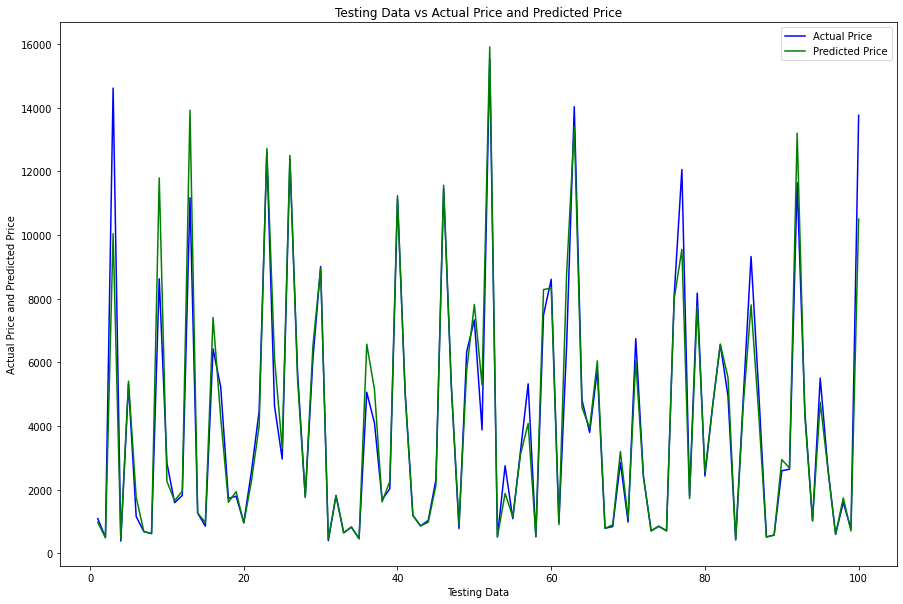

In [128]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I6, I7,'b', label='Actual Price')
plt.plot(I6, I8,'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [129]:
df1['Difference'] = None

In [130]:
df1['Percentage of Difference'] = None

In [131]:
df1

,Actual Price,Predicted Price,Difference,Percentage of Difference
39793,1095,979.0,None,None
43610,507,492.0,None,None
25710,14615,10042.0,None,None
41580,388,453.0,None,None
12756,5322,5411.0,None,None
...,...,...,...,...
37179,972,972.0,None,None
18477,7523,8022.0,None,None
28766,680,680.0,None,None
30025,718,770.0,None,None


In [132]:
index_actual=df1.columns.get_loc('Actual Price')
index_predicted=df1.columns.get_loc('Predicted Price')
index_difference=df1.columns.get_loc('Difference')
index_percentage=df1.columns.get_loc('Percentage of Difference')
 
print(index_actual,index_predicted,index_difference,index_percentage)

0 1 2 3


In [133]:
for row in range(0, len(df1)):
    df1.iat[row, index_difference] = abs(df1.iat[row, index_actual] - df1.iat[row, index_predicted])
    df1.iat[row, index_percentage] = df1.iat[row, index_difference]/df1.iat[row, index_actual]*100
    
df1

,Actual Price,Predicted Price,Difference,Percentage of Difference
39793,1095,979.0,116.0,10.593607
43610,507,492.0,15.0,2.95858
25710,14615,10042.0,4573.0,31.289771
41580,388,453.0,65.0,16.752577
12756,5322,5411.0,89.0,1.672304
...,...,...,...,...
37179,972,972.0,0.0,0.0
18477,7523,8022.0,499.0,6.632992
28766,680,680.0,0.0,0.0
30025,718,770.0,52.0,7.24234


In [134]:
file2="result_dt.xlsx"

In [135]:
df1.to_excel(file2)